In [1]:
!which python

/home/utente/bahamas_test/bin/python


In [5]:
import yaml 
import corner
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# This is the configuration file
config_file = '../template/config.yaml'
with open(config_file, 'r') as file:
    config = yaml.safe_load(file)
    
print("We are using the following configuration:")
print(yaml.dump(config, default_flow_style=False))

We are using the following configuration:
T: 31557600.0
dt: 10
f1: 0.0001
f2: 0.029
file: ../data/data_whittle
fileAV: ../data/data_gamma
folder_plot: ../data/
gen2: true
inference:
  adapt_matrix: true
  beta: 1
  chain_method: parallel
  chains: 1
  file: ../data/data_gamma
  file_post: ../data/result_gamma.npz
  likelihood: Gamma
  sampler: NUTS
  samples: 4000
  warmup: 1000
mod: log
nseg: 1000
response_num: true



In [7]:
# This is the sources file
sources_file = '../template/pe_galaxy_stat.yaml'
with open(sources_file, 'r') as file:
    sources = yaml.safe_load(file)

print("We are using the following sources:")
print(yaml.dump(sources, default_flow_style=False))

#Extract injected parameters
par = []
for key in sources['sources']: 
    # Extract the injected parameters
    for i in range(len(sources['sources'][key])):
        print(f"Injected parameter {i}: {sources['sources'][key][i]['injected']}")
        par.append(sources['sources'][key][i]['injected'])
# Convert to numpy array
par = np.array(par)
  


We are using the following sources:
sources:
  instr_noise:
  - bounds:
    - 1
    - 5
    injected: 2.4
    name: A
  - bounds:
    - 3
    - 10
    injected: 7.9
    name: P
  power_law:
  - bounds:
    - -16
    - -3
    injected: -10.5
    name: Amp
  - bounds:
    - 0
    - 5
    injected: 0.67
    name: slope

Injected parameter 0: 2.4
Injected parameter 1: 7.9
Injected parameter 0: -10.5
Injected parameter 1: 0.67


In [8]:
!bahamas_data --config ../template/config.yaml --sources ../template/pe_galaxy_stat.yaml

2025-06-23 20:08:04,638 - BAHAMAS - INFO - Using JAX backend.
2025-06-23 20:08:04,639 - BAHAMAS - INFO - np is from: jax.numpy
2025-06-23 20:08:11,027 - BAHAMAS - INFO - Production of full resolution series
2025-06-23 20:08:11,027 - BAHAMAS - INFO - Production of full resolution series
2025-06-23 20:08:37,883 - BAHAMAS - INFO - Data saved in ../data/data_whittle.h5 and ../data/data_gamma.h5
2025-06-23 20:08:37,883 - BAHAMAS - INFO - Data saved in ../data/data_whittle.h5 and ../data/data_gamma.h5
2025-06-23 20:08:37,888 - BAHAMAS - INFO - Plotting signals.
2025-06-23 20:08:37,888 - BAHAMAS - INFO - Plotting signals.
2025-06-23 20:08:54,773 - BAHAMAS - INFO - SNR of power_law: 790
2025-06-23 20:08:54,773 - BAHAMAS - INFO - SNR of power_law: 790
2025-06-23 20:08:54,773 - BAHAMAS - INFO - Processing completed.
2025-06-23 20:08:54,773 - BAHAMAS - INFO - Processing completed.


In [9]:
!bahamas_inference --config ../template/config.yaml --sources ../template/pe_galaxy_stat.yaml 

2025-06-23 20:09:05,611 - BAHAMAS - INFO - Using JAX backend.
2025-06-23 20:09:05,611 - BAHAMAS - INFO - np is from: jax.numpy
2025-06-23 20:09:13,001 - BAHAMAS_Inference - INFO - JAX devices available: [CpuDevice(id=0)]
2025-06-23 20:09:13,001 - BAHAMAS_Inference - INFO - Running inference with config: ../template/config.yaml and sources: ../template/pe_galaxy_stat.yaml
2025-06-23 20:09:13,001 - BAHAMAS_Inference - INFO - Running inference...
2025-06-23 20:09:13,011 - BAHAMAS - INFO - Number of chunks: 1
sample: 100%|█| 5000/5000 [00:15<00:00, 329.70it/s, 127 steps of size 4.48e-02. 
2025-06-23 20:09:36,330 - BAHAMAS_Inference - INFO - Inference completed successfully.
2025-06-23 20:09:36,330 - BAHAMAS_Inference - INFO - Results saved to: ../data/result_gamma.npz


Posterior samples loaded from: {'chain': {'instr_noise_A': Array([2.409981 , 2.4076858, 2.4087481, ..., 2.4060838, 2.4092553,
       2.3991597], dtype=float32), 'instr_noise_P': Array([7.8955503, 7.8924065, 7.889084 , ..., 7.893747 , 7.8983493,
       7.898108 ], dtype=float32), 'power_law_Amp': Array([-10.460419, -10.463651, -10.462742, ..., -10.486757, -10.480562,
       -10.521449], dtype=float32), 'power_law_slope': Array([0.6880998 , 0.6877638 , 0.6883207 , ..., 0.67664206, 0.68006474,
       0.6619924 ], dtype=float32), 'log_likelihood': Array([79318.73, 79318.96, 79317.77, ..., 79319.95, 79319.8 , 79320.45],      dtype=float32), 'beta': 1}, 'autocorr': array([[ 1.        ,  1.        ,  1.        ,  1.        ],
       [ 0.47749827,  0.37674325,  0.65122358,  0.65656008],
       [ 0.25460124,  0.21198993,  0.44895027,  0.45143223],
       ...,
       [ 0.13458654,  0.36459735,  0.77557772,  0.69106629],
       [ 0.25441061,  0.10731006,  0.53381396,  0.44871442],
       [-0.9232

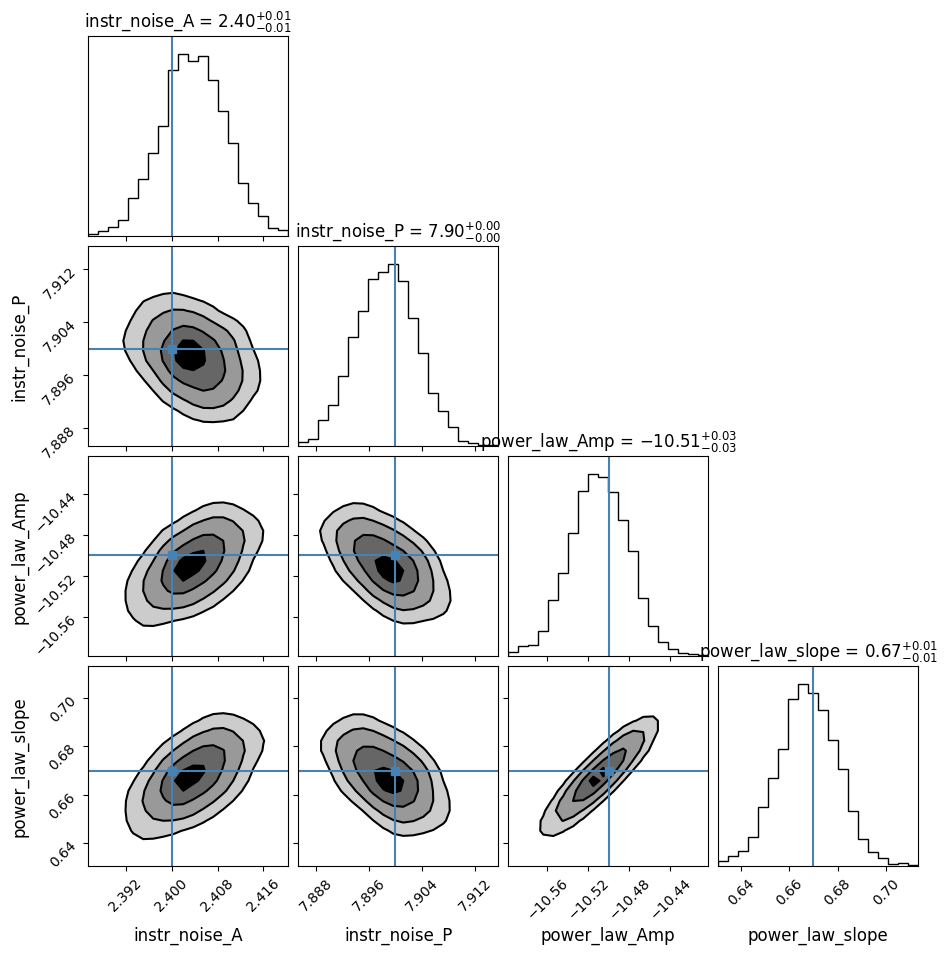

In [10]:
import corner

# Load the results from the inference
results = config['inference']['file_post']
posterior = np.load(results, allow_pickle=True)['posterior'][()]
print("Posterior samples loaded from:", posterior)

param_names = []
param_values = []


for key in posterior['chain'].keys():
  
    if key == 'log_likelihood':
        break
    else:
        param_names.append(key)
        param_values.append(posterior['chain'][key])
print("Parameters found in the posterior:", param_names)
# Stack the parameters into an array for corner
samples = np.vstack(param_values).T  # Shape: (n_samples, n_params)

# Plot corner plot
figure = corner.corner(samples, labels=param_names, show_titles=True, smooth=True, fill_contours=True, truths=par,
                      plot_datapoints=False, title_kwargs={"fontsize": 12}, label_kwargs={"fontsize": 12})

plt.show()